In [2]:
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [5]:
actual_frequencies = pd.read_csv('../data/frequencies/southeast_asia_serotype_frequencies.csv', index_col=0)
predicted_frequency_files = glob('../fitness_model/southeast_asia/serotype/*predicted_freqs*') 
predicted_frequencies = { float(f.split('dt')[1].split('.csv')[0]) : pd.read_csv(f, index_col = 0) for f in predicted_frequency_files}

In [18]:
def collect_prediction_error(actual_df, predicted_df):
    datemin, datemax = predicted_df.index.min(), predicted_df.index.max()
    actual = actual_df.loc[(actual_df.index >= datemin) & (actual_df.index <= datemax)]
    predicted = predicted_df.loc[(predicted_df.index >= datemin) & (predicted_df.index <= datemax)]
    assert actual.index.tolist() == predicted.index.tolist()
    
    observed_error = []
    for clade in actual.columns.values:
        clade_error = predicted[clade] - actual[clade]
        observed_error += clade_error.loc[np.isfinite(clade_error)].tolist()
    
    return observed_error
        
error = {dt: collect_prediction_error(actual_frequencies, predicted_frequencies[dt]) for dt in predicted_frequencies.keys()}

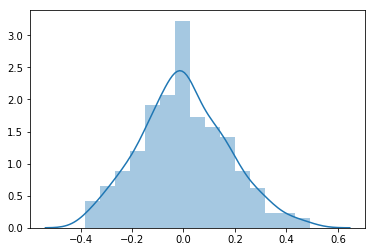

In [21]:
sns.distplot(error[5])